<a href="https://colab.research.google.com/github/Ali-Fartout/Kaggle/blob/main/Facial-Keypoints-Detection/Facial_Keypoints_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Requirement

In [1]:
! pip install kaggle

In [2]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [3]:
! cp kaggle.json ~/.kaggle/

In [4]:
! chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle competitions download -c facial-keypoints-detection

test.zip: Skipping, found more recently modified local copy (use --force to force download)
training.zip: Skipping, found more recently modified local copy (use --force to force download)
IdLookupTable.csv: Skipping, found more recently modified local copy (use --force to force download)
SampleSubmission.csv: Skipping, found more recently modified local copy (use --force to force download)


In [6]:
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/kaggle.json

# First look 

In [7]:
import pandas as pd
import zipfile
import numpy as np
import matplotlib.pyplot as plt

In [8]:
for fileName in ['test.zip','training.zip']:
  zip_ref = zipfile.ZipFile(fileName, "r")
  zip_ref.extractall()
  zip_ref.close()

In [9]:
test_data = pd.read_csv("test.csv")
train_data = pd.read_csv("training.csv")

In [10]:
xTrain  = train_data.loc[:,"Image"]
yTrain = train_data.loc[:,:"mouth_center_bottom_lip_y"]
xTest = test_data.loc[:,"Image"]

In [11]:
def RegulatingImages(data,lenght):
  images = []
  for i in range(0,lenght):
      img = data[i].split(' ')
      img = ['0' if x == '' else x for x in img]
      images.append(img)

  imageList = np.array(images,dtype = 'float')
  cleanedData = imageList.reshape(-1,96,96)
  return cleanedData

In [12]:
xTrain = RegulatingImages(xTrain,7049)
xTest =  RegulatingImages(xTest,1783)

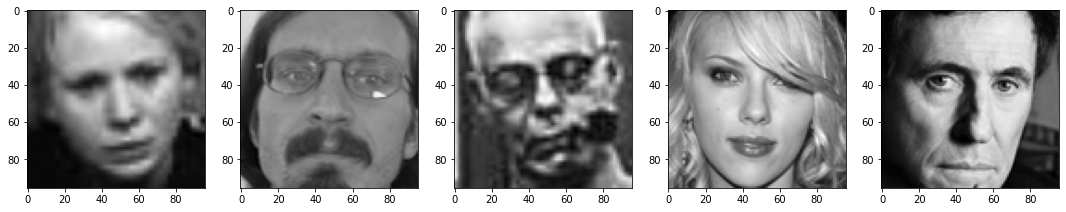

In [13]:
import random
fig, axs = plt.subplots(1,5)

for i in range(0,5):
  randomNumber = random.randint(0,7049)
  axs[i].imshow(xTrain[randomNumber].reshape(96,96),cmap='gray')

fig.set_size_inches(18.5, 10.5)
plt.show()

# Cleaning

In [15]:
train_data.isnull().any().value_counts()

True     28
False     3
dtype: int64